In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Importing The Data

In [2]:
file = "SNUMB_Sept_2018.csv"

In [3]:
read_file = pd.read_csv(file)
df = pd.DataFrame(read_file)

In [4]:
df.head()

,Submission Date,Sequence Date,Organism,(S)NUMB,NAME,TANGO ###,EXPERIMENT,ADAPTER #,ADAPTER SEQ,ADAPTER KIT,...,RNA-Seq Indexes,Unnamed: 15,Unnamed: 16,ChIP-Seq Indexes,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,December 11 2014,NaN,dm3,S0002,dsLacz,TANGO-002,RNA-Seq,AR005,ACAGTG,TruSeqLT-illumina,...,TruSeqLT,NaN,NaN,BiooScientific NEXTflex DNA,NaN,NaN,NaN,NaN,NaN,NaN
1,December 11 2014,NaN,dm3,S0003,dsPaf1-1,TANGO-002,RNA-Seq,AR006,GCCAAT,TruSeqLT-illumina,...,Set A,NaN,NaN,A1,CGATGT,NaN,NaN,NaN,NaN,NaN
2,December 11 2014,NaN,dm3,S0004,dsPaf1-2,TANGO-002,RNA-Seq,AR012,CTTGTA,TruSeqLT-illumina,...,AR002,CGATGT,NaN,A2,TGACCA,NaN,NaN,NaN,NaN,NaN
3,December 11 2014,NaN,dm3,S0005,dsLeo1-1,TANGO-002,RNA-Seq,AR019,GTGAAA,TruSeqLT-illumina,...,AR004,TGACCA,NaN,A3,ACAGTG,NaN,NaN,NaN,NaN,NaN
4,December 11 2014,NaN,dm3,S0006,dsLeo1-2,TANGO-002,RNA-Seq,AR013,AGTCAA,TruSeqLT-illumina,...,AR005,ACAGTG,NaN,A4,GCCAAT,NaN,NaN,NaN,NaN,


In [5]:
df = df[['Submission Date', 'Sequence Date', 'Organism', '(S)NUMB', 'NAME',\
       'TANGO ###', 'EXPERIMENT', 'ADAPTER #', 'ADAPTER SEQ', 'ADAPTER KIT',\
       'REQUESTER', 'SEQ-STATUS', 'PI']]

In [6]:
df['Tango'], df['Tango #'] = df['TANGO ###'].str.split('-', 1).str

In [7]:
df = df[['Submission Date', 'Sequence Date', 'Organism', '(S)NUMB', 'NAME',
       'Tango #', 'EXPERIMENT', 'ADAPTER #', 'ADAPTER SEQ', 'ADAPTER KIT',
       'REQUESTER', 'SEQ-STATUS', 'PI']]

In [8]:
df['Tango #'] = pd.to_numeric(df['Tango #'])
df['Submission Date'] = pd.to_datetime(df['Submission Date'], format='%B %d %Y')
df['Sequence Date'] = pd.to_datetime(df['Sequence Date'], format='%B %d %Y')
df = df[['PI','REQUESTER','Tango #','EXPERIMENT','Organism','Submission Date','Sequence Date','SEQ-STATUS']]

In [9]:
df.head()

,PI,REQUESTER,Tango #,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS
0,Shilatifard,Ryan,2,RNA-Seq,dm3,2014-12-11,NaT,COMPLETE
1,Shilatifard,Ryan,2,RNA-Seq,dm3,2014-12-11,NaT,COMPLETE
2,Shilatifard,Ryan,2,RNA-Seq,dm3,2014-12-11,NaT,COMPLETE
3,Shilatifard,Ryan,2,RNA-Seq,dm3,2014-12-11,NaT,COMPLETE
4,Shilatifard,Ryan,2,RNA-Seq,dm3,2014-12-11,NaT,COMPLETE


In [10]:
print(f'Total number of entries in database: {len(df)}')
print(f'Current SNUMB #: 13746')

Total number of entries in database: 13736
Current SNUMB #: 13746


In [11]:
df['Sequence Date'] = df['Sequence Date'].fillna(value='Not Sequenced')
project_df = df.groupby(['Tango #', 'PI', 'REQUESTER', 'EXPERIMENT', 'Organism', 'Submission Date', 'Sequence Date', 'SEQ-STATUS'])\
                ['Tango #'].agg(['count']).reset_index()

In [12]:
project_df.head()

,Tango #,PI,REQUESTER,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS,count
0,2,Shilatifard,Ryan,RNA-Seq,dm3,2014-12-11,Not Sequenced,COMPLETE,5
1,3,Shilatifard,Kai,RNA-Seq,hg19,2014-12-11,Not Sequenced,COMPLETE,1
2,3,Shilatifard,Kai,RNA-Seq,mm9,2014-12-11,Not Sequenced,COMPLETE,3
3,4,Shilatifard,Kai,4C,mm9,2014-12-12,Not Sequenced,COMPLETE,2
4,5,Shilatifard,Ryan,ChIP-Seq,dm3,2014-12-16,Not Sequenced,COMPLETE,20


In [13]:
print(f'Total number of projects in database: {len(project_df)}')

Total number of projects in database: 1328


# Cleaning Up The Data

In [14]:
troubleshooting_df = pd.concat(group for _, group in project_df.groupby("Tango #") if len(group) > 1)
troubleshooting_df

,Tango #,PI,REQUESTER,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS,count
1,3,Shilatifard,Kai,RNA-Seq,hg19,2014-12-11,Not Sequenced,COMPLETE,1
2,3,Shilatifard,Kai,RNA-Seq,mm9,2014-12-11,Not Sequenced,COMPLETE,3
5,6,Shilatifard,Kai,ChIP-Seq,hg19,2015-01-14,Not Sequenced,COMPLETE,3
6,6,Shilatifard,Kai,ChIP-Seq,mm9,2015-01-14,Not Sequenced,COMPLETE,3
7,6,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-01-14,Not Sequenced,COMPLETE,5
9,8,Shilatifard,Yohhei,ChIP-Seq,hg19,2015-02-10,Not Sequenced,COMPLETE,9
10,8,Shilatifard,Yohhei,ChIP-Seq,sacCer3,2015-02-10,Not Sequenced,COMPLETE,5
28,26,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-03-30,Not Sequenced,COMPLETE,8
29,26,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-04-13,Not Sequenced,COMPLETE,2
34,31,Shilatifard,Andrea,RNA-Seq,hg19,2015-04-07,Not Sequenced,CANCELLED,2


In [15]:
troubleshooting_df = troubleshooting_df[troubleshooting_df['SEQ-STATUS'] == 'COMPLETE']
troubleshooting_df = pd.concat(group for _, group in troubleshooting_df.groupby("Tango #") if len(group) > 1)
troubleshooting_df

,Tango #,PI,REQUESTER,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS,count
1,3,Shilatifard,Kai,RNA-Seq,hg19,2014-12-11,Not Sequenced,COMPLETE,1
2,3,Shilatifard,Kai,RNA-Seq,mm9,2014-12-11,Not Sequenced,COMPLETE,3
5,6,Shilatifard,Kai,ChIP-Seq,hg19,2015-01-14,Not Sequenced,COMPLETE,3
6,6,Shilatifard,Kai,ChIP-Seq,mm9,2015-01-14,Not Sequenced,COMPLETE,3
7,6,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-01-14,Not Sequenced,COMPLETE,5
9,8,Shilatifard,Yohhei,ChIP-Seq,hg19,2015-02-10,Not Sequenced,COMPLETE,9
10,8,Shilatifard,Yohhei,ChIP-Seq,sacCer3,2015-02-10,Not Sequenced,COMPLETE,5
28,26,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-03-30,Not Sequenced,COMPLETE,8
29,26,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-04-13,Not Sequenced,COMPLETE,2
74,113,Shilatifard,Fei,RNA-Seq,hg19,2015-07-17,2015-08-27 00:00:00,COMPLETE,1


In [16]:
def update_date(correct_value_index, incorrect_value_index_array, project_name):
    correct_date = df.iloc[correct_value_index]['Sequence Date']
    for index in incorrect_value_index_array:
        incorrect_date = df.iloc[index]['Sequence Date']
        df['Sequence Date'][index] = correct_date
        print(f'Fixing incorrect value for project {project_name}')
        print(f'Value {incorrect_date} has been changed to {correct_date}')
        print(f'\n')

In [17]:
df.loc[df['Tango #'] == 137, :]

,PI,REQUESTER,Tango #,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS
1269,Shilatifard,Deqing,137,RNA-Seq,mm9,2015-08-17,2015-10-22 00:00:00,COMPLETE
1270,Shilatifard,Deqing,137,RNA-Seq,mm9,2015-08-17,2016-10-22 00:00:00,COMPLETE
1271,Shilatifard,Deqing,137,RNA-Seq,mm9,2015-08-17,2017-10-22 00:00:00,COMPLETE
1272,Shilatifard,Deqing,137,RNA-Seq,mm9,2015-08-17,2018-10-22 00:00:00,COMPLETE
1273,Shilatifard,Deqing,137,RNA-Seq,mm9,2015-08-17,2019-10-22 00:00:00,COMPLETE
1274,Shilatifard,Deqing,137,RNA-Seq,mm9,2015-08-17,2020-10-22 00:00:00,COMPLETE
1275,Shilatifard,Deqing,137,RNA-Seq,mm9,2015-08-17,2021-10-22 00:00:00,COMPLETE
1276,Shilatifard,Deqing,137,RNA-Seq,mm9,2015-08-17,2022-10-22 00:00:00,COMPLETE


In [18]:
incorrect_value_list_137 = [1270, 1271, 1272, 1273, 1274, 1275, 1276]
update_date(1269, incorrect_value_list_137, 137)

/Users/stacyannmarshall/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Fixing incorrect value for project 137
Value 2016-10-22 00:00:00 has been changed to 2015-10-22 00:00:00


Fixing incorrect value for project 137
Value 2017-10-22 00:00:00 has been changed to 2015-10-22 00:00:00


Fixing incorrect value for project 137
Value 2018-10-22 00:00:00 has been changed to 2015-10-22 00:00:00


Fixing incorrect value for project 137
Value 2019-10-22 00:00:00 has been changed to 2015-10-22 00:00:00


Fixing incorrect value for project 137
Value 2020-10-22 00:00:00 has been changed to 2015-10-22 00:00:00


Fixing incorrect value for project 137
Value 2021-10-22 00:00:00 has been changed to 2015-10-22 00:00:00


Fixing incorrect value for project 137
Value 2022-10-22 00:00:00 has been changed to 2015-10-22 00:00:00




In [19]:
df.loc[df['Tango #'] == 113, :]

,PI,REQUESTER,Tango #,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS
1038,Shilatifard,Fei,113,RNA-Seq,hg19,2015-07-17,2015-08-27 00:00:00,COMPLETE
1039,Shilatifard,Fei,113,RNA-Seq,hg19,2015-07-17,2016-08-27 00:00:00,COMPLETE
1040,Shilatifard,Fei,113,RNA-Seq,hg19,2015-07-17,2017-08-27 00:00:00,COMPLETE
1041,Shilatifard,Fei,113,RNA-Seq,hg19,2015-07-17,2018-08-27 00:00:00,COMPLETE
1042,Shilatifard,Fei,113,RNA-Seq,hg19,2015-07-17,2019-08-27 00:00:00,COMPLETE
1043,Shilatifard,Fei,113,RNA-Seq,hg19,2015-07-17,2020-08-27 00:00:00,COMPLETE


In [20]:
incorrect_value_list_113 = [1039, 1040, 1041, 1042, 1043]
update_date(1038, incorrect_value_list_113, 113)

Fixing incorrect value for project 113
Value 2016-08-27 00:00:00 has been changed to 2015-08-27 00:00:00


Fixing incorrect value for project 113
Value 2017-08-27 00:00:00 has been changed to 2015-08-27 00:00:00


Fixing incorrect value for project 113
Value 2018-08-27 00:00:00 has been changed to 2015-08-27 00:00:00


Fixing incorrect value for project 113
Value 2019-08-27 00:00:00 has been changed to 2015-08-27 00:00:00


Fixing incorrect value for project 113
Value 2020-08-27 00:00:00 has been changed to 2015-08-27 00:00:00




/Users/stacyannmarshall/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
project_df = df.groupby(['Tango #', 'PI', 'REQUESTER', 'EXPERIMENT', 'Organism', 'Submission Date', 'Sequence Date', 'SEQ-STATUS'])\
                ['Tango #'].agg(['count']).reset_index()
print(f'Total number of projects in database: {len(project_df)}')

Total number of projects in database: 1316


In [22]:
troubleshooting_df = pd.concat(group for _, group in project_df.groupby("Tango #") if len(group) > 1)
troubleshooting_df

,Tango #,PI,REQUESTER,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS,count
1,3,Shilatifard,Kai,RNA-Seq,hg19,2014-12-11,Not Sequenced,COMPLETE,1
2,3,Shilatifard,Kai,RNA-Seq,mm9,2014-12-11,Not Sequenced,COMPLETE,3
5,6,Shilatifard,Kai,ChIP-Seq,hg19,2015-01-14,Not Sequenced,COMPLETE,3
6,6,Shilatifard,Kai,ChIP-Seq,mm9,2015-01-14,Not Sequenced,COMPLETE,3
7,6,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-01-14,Not Sequenced,COMPLETE,5
9,8,Shilatifard,Yohhei,ChIP-Seq,hg19,2015-02-10,Not Sequenced,COMPLETE,9
10,8,Shilatifard,Yohhei,ChIP-Seq,sacCer3,2015-02-10,Not Sequenced,COMPLETE,5
28,26,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-03-30,Not Sequenced,COMPLETE,8
29,26,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-04-13,Not Sequenced,COMPLETE,2
34,31,Shilatifard,Andrea,RNA-Seq,hg19,2015-04-07,Not Sequenced,CANCELLED,2


In [23]:
cancelled_df = project_df[project_df['SEQ-STATUS'] == 'CANCELLED'].reset_index()
project_df = project_df[project_df['SEQ-STATUS'] == 'COMPLETE'].reset_index()
print(f'Total number of completed projects in database: {len(project_df)}')
print(f'Total number of projects with cancelled samples in database = {len(cancelled_df)}')

Total number of completed projects in database: 1224
Total number of projects with cancelled samples in database = 74


In [24]:
troubleshooting_df = pd.concat(g for _, g in project_df.groupby("Tango #") if len(g) > 1)
troubleshooting_df

,index,Tango #,PI,REQUESTER,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS,count
1,1,3,Shilatifard,Kai,RNA-Seq,hg19,2014-12-11,Not Sequenced,COMPLETE,1
2,2,3,Shilatifard,Kai,RNA-Seq,mm9,2014-12-11,Not Sequenced,COMPLETE,3
5,5,6,Shilatifard,Kai,ChIP-Seq,hg19,2015-01-14,Not Sequenced,COMPLETE,3
6,6,6,Shilatifard,Kai,ChIP-Seq,mm9,2015-01-14,Not Sequenced,COMPLETE,3
7,7,6,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-01-14,Not Sequenced,COMPLETE,5
9,9,8,Shilatifard,Yohhei,ChIP-Seq,hg19,2015-02-10,Not Sequenced,COMPLETE,9
10,10,8,Shilatifard,Yohhei,ChIP-Seq,sacCer3,2015-02-10,Not Sequenced,COMPLETE,5
28,28,26,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-03-30,Not Sequenced,COMPLETE,8
29,29,26,Shilatifard,Zhuojuan,ChIP-Seq,mm9,2015-04-13,Not Sequenced,COMPLETE,2
162,173,209,Shilatifard,NGS,RNA-Seq,dm3,2015-11-23,Not Sequenced,COMPLETE,2


# Understanding The Data

### Number of projects for each alignment genome

In [25]:
organism_counts = project_df['Organism'].value_counts()
information = {
    'Organism' : organism_counts.keys(),
    'Number of Projects' : list(organism_counts.values)
}
organism_df = pd.DataFrame(information)
organism_df = organism_df.set_index('Organism')
organism_df

,Number of Projects
Organism,
hg19,798
mm9,338
dm3,45
sacCer3,27
hg38,14
3610,1
rn6,1


### Total number of samples for each alignment genome

In [26]:
complete_df = df[df['SEQ-STATUS'] == 'COMPLETE'].reset_index()
organism_count_df = complete_df.groupby(['Organism'])['Organism'].agg(['count'])
organism_count_df = organism_count_df.sort_values(by='count', ascending=False)
organism_count_df = organism_count_df.rename(columns={'count' : 'Number of Samples'})
organism_count_df

,Number of Samples
Organism,
hg19,8426
mm9,3434
sacCer3,624
dm3,407
hg38,126
rn6,10
3610,6


### Merge organism dataframes

In [27]:
merged_organism_df = organism_count_df.join(organism_df, how='inner')
merged_organism_df['Average Samples per Submission'] = \
            merged_organism_df['Number of Samples'] / merged_organism_df['Number of Projects']
merged_organism_df['Average Samples per Submission'] = merged_organism_df['Average Samples per Submission'].map("{:.2f}".format)
merged_organism_df

,Number of Samples,Number of Projects,Average Samples per Submission
Organism,,,
hg19,8426,798,10.56
mm9,3434,338,10.16
sacCer3,624,27,23.11
dm3,407,45,9.04
hg38,126,14,9.00
rn6,10,1,10.00
3610,6,1,6.00


### Visualize Organismal Breakdown of Submissions

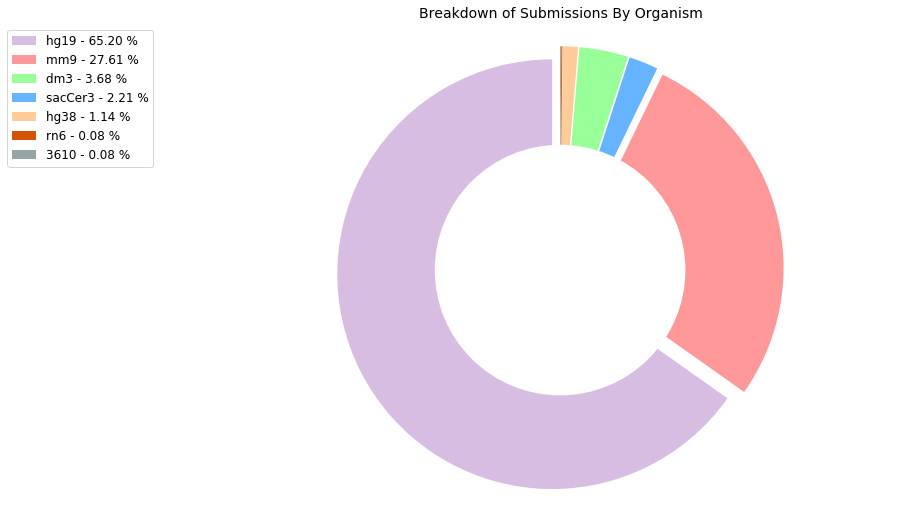

In [28]:
fig, ax = plt.subplots(figsize=(12, 9))
labels = merged_organism_df.index
values = merged_organism_df['Number of Projects']
colors = ['#D7BDE2','#ff9999','#66b3ff','#99ff99','#ffcc99', '#D35400', '#95A5A6']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
percent = 100.*values/values.sum()

patches, texts = plt.pie(values, colors=colors, startangle=90, radius=1.2, explode=explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
labels_official = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]

sort_legend = True
if sort_legend:
    patches, labels_official, dummy =  zip(*sorted(zip(patches, labels_official, values),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels_official, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.axis('equal')
plt.title('Breakdown of Submissions By Organism', fontsize=14)
plt.show()

### Calculate Turn Around Time Per Submission

In [29]:
project_df.tail()

,index,Tango #,PI,REQUESTER,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS,count
1219,1306,1311,Eagen,Haneen,ChIP-Seq,hg38,2018-09-18,2018-09-18 00:00:00,COMPLETE,7
1220,1307,1312,Shilatifard,Delphine,CRISPR,hg19,2018-09-18,2018-09-26 00:00:00,COMPLETE,6
1221,1309,1314,Shilatifard,Delphine,CRISPR,hg19,2018-08-20,2018-09-20 00:00:00,COMPLETE,10
1222,1311,1316,Shilatifard,Lu,ChIP-Seq,hg19,2018-09-21,2018-09-26 00:00:00,COMPLETE,14
1223,1312,1317,Shilatifard,Lu,ChIP-Seq,hg19,2018-09-21,2018-09-27 00:00:00,COMPLETE,16


In [30]:
project_df['Submission Date'] = pd.to_datetime(project_df['Submission Date'])
project_df['Sequence Date'] = pd.to_datetime(project_df['Sequence Date'], errors='coerce')
project_df['Processing Time'] = project_df['Sequence Date'] - project_df['Submission Date']
project_df['Processing Time'] = project_df['Processing Time'].astype(str)
project_df['Num Processing Days'], project_df['Placeholder'] = project_df['Processing Time'].str.split('days', 1).str

In [31]:
project_df = project_df[['Tango #', 'PI', 'REQUESTER', 'EXPERIMENT', 'Organism', 'Submission Date', \
                        'Sequence Date', 'SEQ-STATUS', 'count', 'Num Processing Days']]
project_df = project_df.rename(columns={'count' : 'Number of Samples'})
project_df = project_df.replace('NaT', np.NaN)
project_df['Num Processing Days'] = project_df['Num Processing Days'].astype(float)

In [32]:
project_df.tail()

,Tango #,PI,REQUESTER,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS,Number of Samples,Num Processing Days
1219,1311,Eagen,Haneen,ChIP-Seq,hg38,2018-09-18,2018-09-18,COMPLETE,7,0.0
1220,1312,Shilatifard,Delphine,CRISPR,hg19,2018-09-18,2018-09-26,COMPLETE,6,8.0
1221,1314,Shilatifard,Delphine,CRISPR,hg19,2018-08-20,2018-09-20,COMPLETE,10,31.0
1222,1316,Shilatifard,Lu,ChIP-Seq,hg19,2018-09-21,2018-09-26,COMPLETE,14,5.0
1223,1317,Shilatifard,Lu,ChIP-Seq,hg19,2018-09-21,2018-09-27,COMPLETE,16,6.0


### Calculate Average Turn Around Time By Experiment Type

In [33]:
processing_df = project_df.groupby(['EXPERIMENT'])['Num Processing Days'].agg(['mean'])
processing_df = processing_df.rename(columns={'mean': 'Average Turn Around Time'})
processing_df['Average Turn Around Time'] = processing_df['Average Turn Around Time'].map("{:.2f}".format)
processing_df

,Average Turn Around Time
EXPERIMENT,
4C,5.00
4SU-seq,14.00
ATAC-Seq,15.08
Bisulfite-seq,21.00
CRISPR,17.48
ChIP-Seq,13.06
ChIPmentation,18.00
DNA Methylation,-0.75
DRIP-seq,24.00


### Plotting Average Turn Around Time Per Experiment Type

No handles with labels found to put in legend.


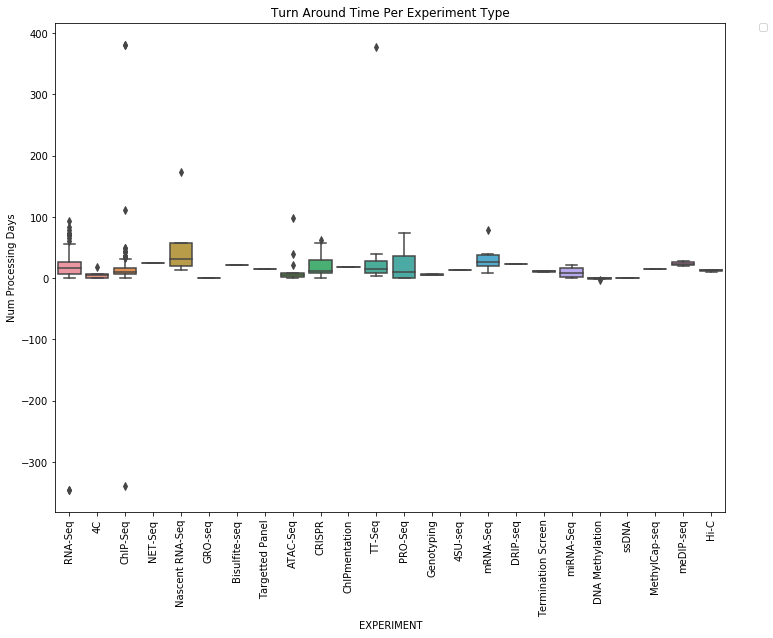

In [34]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.boxplot(x=project_df['EXPERIMENT'], y=project_df['Num Processing Days'], data=project_df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Turn Around Time Per Experiment Type')
plt.show()

### Taking a Closer Look at Dramatic Outliers

In [35]:
project_df.loc[project_df['Num Processing Days'] > 100, :]

,Tango #,PI,REQUESTER,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS,Number of Samples,Num Processing Days
159,206,Shilatifard,Kevin,Nascent RNA-Seq,hg19,2015-11-17,2016-05-09,COMPLETE,4,174.0
385,434,Shilatifard,Fei,ChIP-Seq,hg19,2016-07-05,2016-10-24,COMPLETE,16,111.0
839,899,Shilatifard,Andrea,ChIP-Seq,hg19,2017-10-09,2018-10-25,COMPLETE,12,381.0
850,910,Shilatifard,Andrea,ChIP-Seq,hg19,2017-10-09,2018-10-25,COMPLETE,12,381.0
1053,1130,Shilatifard,Kai,TT-Seq,mm9,2017-04-25,2018-05-07,COMPLETE,6,377.0


In [36]:
project_df.loc[project_df['Num Processing Days'] < 0, :]

,Tango #,PI,REQUESTER,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS,Number of Samples,Num Processing Days
289,336,Shilatifard,Kai,ChIP-Seq,mm9,2016-03-29,2015-04-25,COMPLETE,5,-339.0
943,1013,Shilatifard,Lu/Ben Singer,DNA Methylation,hg19,2018-01-22,2018-01-19,COMPLETE,6,-3.0
1069,1146,Shilatifard,Kai,RNA-Seq,mm9,2018-05-04,2017-05-24,COMPLETE,10,-345.0
1070,1147,Shilatifard,Kai,RNA-Seq,mm9,2018-05-04,2017-05-24,COMPLETE,10,-345.0


In [37]:
df.loc[df['Tango #'] == 336, :]

,PI,REQUESTER,Tango #,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS
3133,Shilatifard,Kai,336,ChIP-Seq,mm9,2016-03-29,2015-04-25 00:00:00,COMPLETE
3134,Shilatifard,Kai,336,ChIP-Seq,mm9,2016-03-29,2015-04-25 00:00:00,COMPLETE
3135,Shilatifard,Kai,336,ChIP-Seq,mm9,2016-03-29,2015-04-25 00:00:00,COMPLETE
3136,Shilatifard,Kai,336,ChIP-Seq,mm9,2016-03-29,2015-04-25 00:00:00,COMPLETE
3137,Shilatifard,Kai,336,ChIP-Seq,mm9,2016-03-29,2015-04-25 00:00:00,COMPLETE


In [38]:
project_df = project_df[project_df['Num Processing Days'] >= 0]
project_df = project_df[project_df['Num Processing Days'] < 100]

### Replotting Average Turn Around Time Per Experiment Type Without Massive Outliers

No handles with labels found to put in legend.


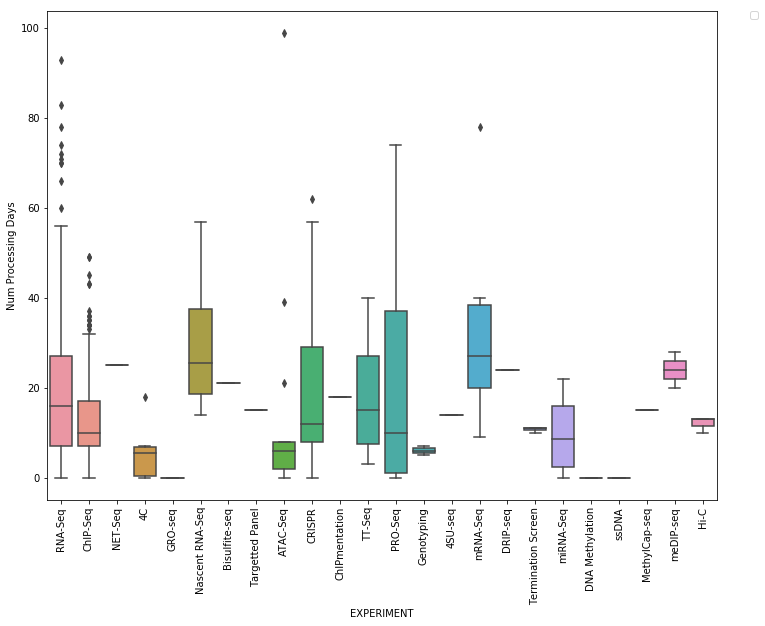

In [39]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.boxplot(x=project_df['EXPERIMENT'], y=project_df['Num Processing Days'], data=project_df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Calculating Average Turn Around Time Per Experiment Without Outliers

In [40]:
processing_df = project_df.groupby(['EXPERIMENT'])['Num Processing Days'].agg(['mean'])
processing_df = processing_df.rename(columns={'mean': 'Average Turn Around Time'})
processing_df['Average Turn Around Time'] = processing_df['Average Turn Around Time'].map("{:.2f}".format)
processing_df

,Average Turn Around Time
EXPERIMENT,
4C,5.00
4SU-seq,14.00
ATAC-Seq,15.08
Bisulfite-seq,21.00
CRISPR,17.48
ChIP-Seq,12.36
ChIPmentation,18.00
DNA Methylation,0.00
DRIP-seq,24.00


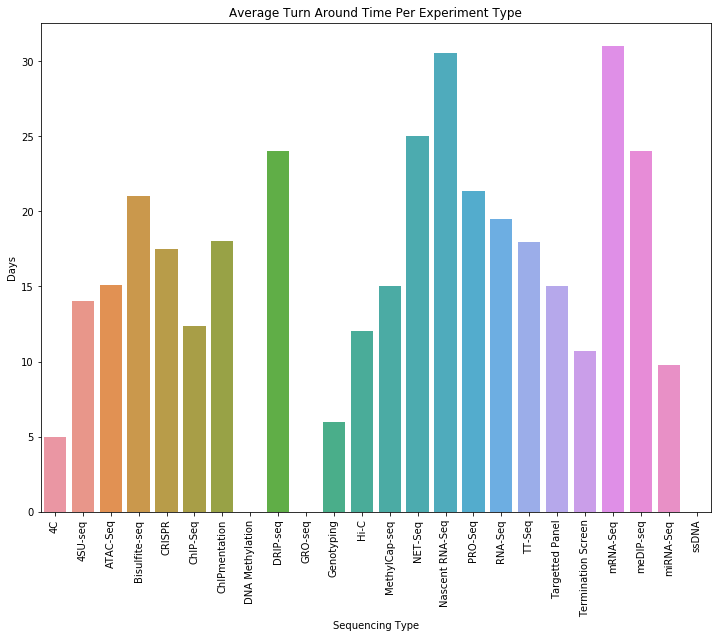

In [41]:
fig, ax = plt.subplots(figsize=(12, 9))
ax = sns.barplot(x=processing_df.index, y=processing_df['Average Turn Around Time'].astype(float), data=processing_df)
plt.xticks(rotation=90)
plt.title('Average Turn Around Time Per Experiment Type')
plt.ylabel('Days')
plt.xlabel('Sequencing Type')
plt.show()

### Looking At Average Turn Around Per Person In The Shilatifard Lab

In [42]:
shilati_turn_around = project_df[project_df['PI'] == 'Shilatifard']

No handles with labels found to put in legend.


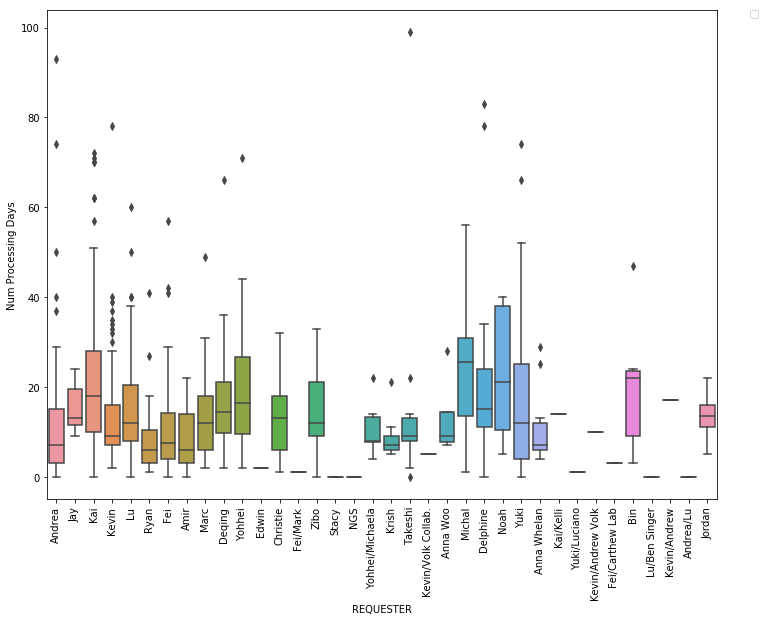

In [43]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.boxplot(x=shilati_turn_around['REQUESTER'], y=project_df['Num Processing Days'], data=project_df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Taking a look at and removing one-off naming

In [44]:
troubleshooting_df = pd.concat(group for _, group in shilati_turn_around.groupby("REQUESTER") if len(group) == 1)
troubleshooting_df

,Tango #,PI,REQUESTER,EXPERIMENT,Organism,Submission Date,Sequence Date,SEQ-STATUS,Number of Samples,Num Processing Days
1095,1172,Shilatifard,Andrea/Lu,ssDNA,hg19,2018-05-23,2018-05-23,COMPLETE,3,0.0
126,171,Shilatifard,Edwin,ChIP-Seq,mm9,2015-10-12,2015-10-14,COMPLETE,5,2.0
910,975,Shilatifard,Fei/Carthew Lab,miRNA-Seq,hg19,2017-12-15,2017-12-18,COMPLETE,9,3.0
168,213,Shilatifard,Fei/Mark,RNA-Seq,mm9,2015-11-24,2015-11-25,COMPLETE,9,1.0
830,890,Shilatifard,Kai/Kelli,ChIP-Seq,hg19,2017-10-02,2017-10-16,COMPLETE,8,14.0
1059,1136,Shilatifard,Kevin/Andrew,ChIP-Seq,hg19,2018-04-30,2018-05-17,COMPLETE,5,17.0
894,957,Shilatifard,Kevin/Andrew Volk,ChIP-Seq,mm9,2017-12-04,2017-12-14,COMPLETE,6,10.0
944,1014,Shilatifard,Lu/Ben Singer,DNA Methylation,hg19,2018-01-22,2018-01-22,COMPLETE,6,0.0
297,344,Shilatifard,NGS,RNA-Seq,hg19,2016-04-18,2016-04-18,COMPLETE,8,0.0
223,269,Shilatifard,Stacy,GRO-seq,hg19,2016-02-05,2016-02-05,COMPLETE,2,0.0


In [45]:
shilati_turn_around = pd.concat(group for _, group in shilati_turn_around.groupby("REQUESTER") if len(group) > 1)

No handles with labels found to put in legend.


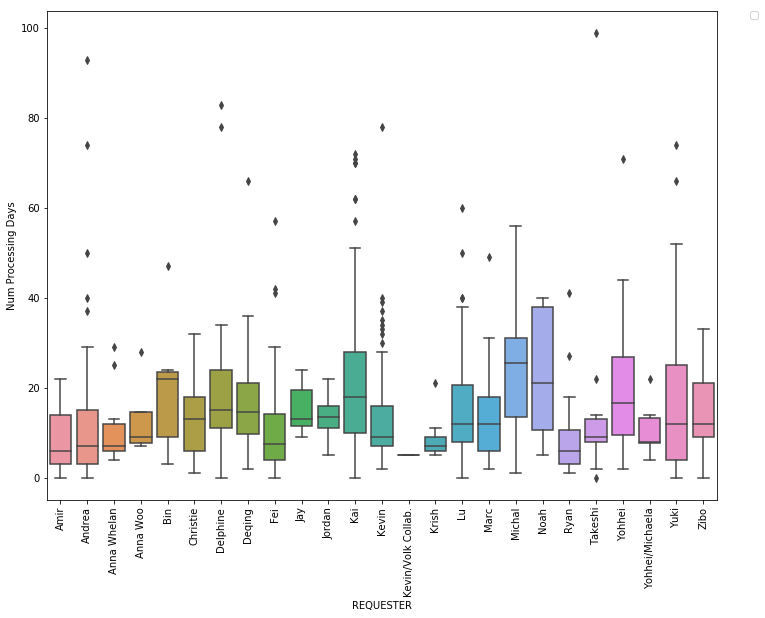

In [46]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.boxplot(x=shilati_turn_around['REQUESTER'], y=project_df['Num Processing Days'], data=project_df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Removing Samples With Processing Days of 0 From Consideration

In [47]:
NGS_project_df = project_df[project_df['Num Processing Days'] > 0]
print(f'{len(project_df) - len(NGS_project_df)} removed from analysis')
NGS_processing_df = NGS_project_df.groupby(['EXPERIMENT'])['Num Processing Days'].agg(['mean'])
NGS_processing_df = NGS_processing_df.rename(columns={'mean': 'Av NGS Turn Around Time'})
NGS_processing_df['Av NGS Turn Around Time'] = NGS_processing_df['Av NGS Turn Around Time'].map("{:.2f}".format)
#NGS_processing_df

27 removed from analysis


In [48]:
merged_processing_df = processing_df.join(NGS_processing_df, how='inner')
merged_processing_df

,Average Turn Around Time,Av NGS Turn Around Time
EXPERIMENT,,
4C,5.00,7.14
4SU-seq,14.00,14.00
ATAC-Seq,15.08,19.60
Bisulfite-seq,21.00,21.00
CRISPR,17.48,20.39
ChIP-Seq,12.36,12.41
ChIPmentation,18.00,18.00
DRIP-seq,24.00,24.00
Genotyping,6.00,6.00


### Taking a look at submission rate per month

In [49]:
timeline_df = project_df.set_index('Submission Date')

In [50]:
submission_df = timeline_df.groupby(pd.Grouper(freq="M"))['Tango #'].agg(['count'])
submission_df = submission_df.rename(columns={'count' : 'Total Submissions'})
submission_df.index = submission_df.index.strftime('%m/%Y')
#submission_df

In [51]:
submission_turn_around_df = timeline_df.groupby(pd.Grouper(freq="M"))['Num Processing Days'].agg(['mean'])
submission_turn_around_df = submission_turn_around_df.rename(columns={'mean' : 'Turn Around (Days)'})
submission_turn_around_df.index = submission_turn_around_df.index.strftime('%m/%Y')
submission_turn_around_df['Turn Around (Days)'] = submission_turn_around_df['Turn Around (Days)'].map("{:.2f}".format)
#submission_turn_around_df

In [52]:
merged_submission_df = submission_df.join(submission_turn_around_df, how='inner')
print(f'Average Submissions/Month: {np.mean(merged_submission_df["Total Submissions"])}')
merged_submission_df

Average Submissions/Month: 29.225


,Total Submissions,Turn Around (Days)
06/2015,8,16.50
07/2015,27,20.11
08/2015,24,28.08
09/2015,14,22.43
10/2015,22,17.00
11/2015,36,14.69
12/2015,13,13.08
01/2016,25,16.92
02/2016,35,14.17
03/2016,36,15.00


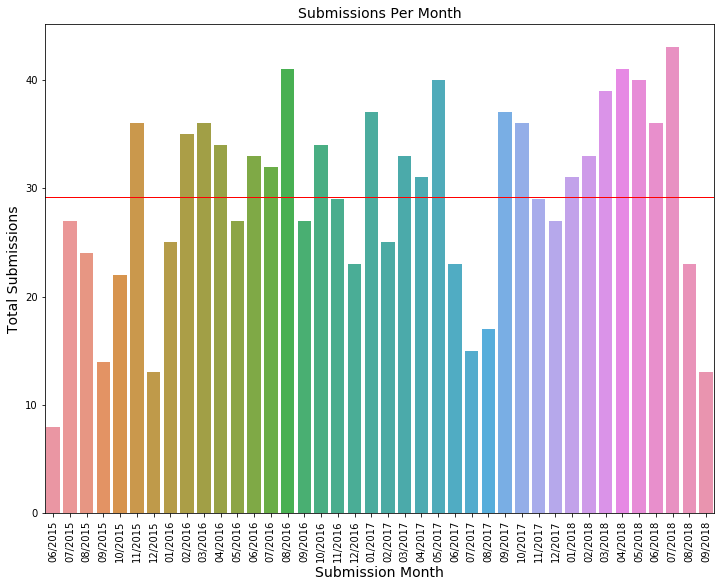

In [53]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x=submission_df.index, y=submission_df['Total Submissions'].astype(float), data=submission_df)
mean = np.mean(submission_df['Total Submissions'])
plt.xticks(rotation=90)
plt.title('Submissions Per Month', fontsize=14)
plt.xlabel('Submission Month', fontsize=14)
plt.ylabel('Total Submissions', fontsize=14)
plt.axhline(y=mean, linewidth=1, color='r')
plt.show()

In [54]:
#sns.regplot(x=merged_submission_df['Total Submissions'], y=merged_submission_df['Turn Around (Days)'].astype(float), data=merged_submission_df)

In [55]:
#np.mean(submission_df['Total Submissions'])